# Detectar y eliminar outliers
### Dataframes y sus columnas donde detectar outliers
-   Order_v3 --> totalValue
-   Diabetes --> bmi
-   California: Housin --> MedInc
-   Inventory_v2 --> Columna value
-   Dataset Diamonds --> Price
### Procedimiento
-   Identificar con bloxplot
-   identificamos con Z-score outliers
-   Identificamos con IQR outliers
-   Comprobamos el sesgo de coeficiente de asimetría
-   Transformamos los datos con transformación logarítmica y Winsorización
-   Comprobamos de nuevo el coeficiente de asimetría

In [236]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats import skew
from tabulate import tabulate


def comprobar_sesgo(skewness):
    """_summary_
    Comprueba el valor del coeficiente de asimetría pasado como parámetro e imprime una descripción en función del valor del mismo
    Args:
        skewness (float): coeficiente de asimetría
    """
    if skewness == 0:
        print("Distribución completamente simétrica")
    elif -1 <= skewness <= 1:
        print("Distribución aceptable")
    elif skewness > 1:
        print("Sesgo positivo (cola larga a la derecha)")
    elif skewness < -1:
        print("Sesgo negativo (cola larga a la izquierda)")


def gestion_outliers(df, columna):
    """_summary_
    Realiza la comprobración y corrección de los outliers encontrados en la columna de un dataframe pasados por parámetro
    Args:
        df (DataFrame): Nombre de la variable del dataframe a analizar
        columna (str): Nombre de la columna del dataframe sobre la que se quieren gestionar outliers
    """
    # Creamos el Boxplot
    plt.figure(figsize=(8, 4))
    # df[columna] es una columna de un DataFrame que contiene los datos que queremos analizar.
    sns.boxplot(x=df[columna])

    # Mostramos el gráfico
    print(f"Box plot de la columna '{columna}':")
    plt.show()

    # Calcular el Z-score
    df['z_score'] = zscore(df[columna])

    # Filtrar los outliers
    # Se considera outlier cuando Z-score es > 3 o < -3, porque cualquier valor más allá de ±3 desviaciones estándar es extremadamente raro.
    outliers_zscore = df[df['z_score'].abs() > 3]

    # Filtrar outliers poisitivos y negativos
    outliers_positivos = df[df['z_score'] > 3]  # Solo valores muy altos
    outliers_negativos = df[df['z_score'] < -3]  # Solo valores muy bajos
    
    # print("Primeros 5 outliers positivos:\n" + outliers_positivos[columna].head())
    print('-' * 40)
    if not outliers_positivos.empty:
        print("Primeros outliers positivos:")
        print(outliers_positivos[columna].head())
    print('-' * 40)
    if not outliers_negativos.empty:
        print("Primeros outliers negativos:")
        print(outliers_negativos[columna].head())

    # Calcular cuartiles
    Q1 = np.percentile(df[columna], 25)  # Primer cuartil (Q1)
    Q3 = np.percentile(df[columna], 75)  # Tercer cuartil (Q3)
    IQR = Q3 - Q1  # Rango intercuartil

    # Definir límites para detectar outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar outliers
    outliers_IQR = df[(df[columna] < limite_inferior) |
                      (df[columna] > limite_superior)]
    # Los valores que están fuera del rango [Q1 - 1.5*IQR, Q3 + 1.5*IQR] se consideran outliers.

    print('-' * 40)
    print("Outliers encontrados con Z-Score: ", len(outliers_zscore))
    print("Outliers encontrados con IQR: ", len(outliers_IQR))
    print('-' * 40)

    # Calculamos el coeficiente de asimetría para observar el sesgo de los datos
    print("Skewness:", skew(df[columna]))
    comprobar_sesgo(skew(df[columna]))
    # Mostramos un histograma para ver la distribución de los datos
    sns.histplot(df[columna], kde=True)
    plt.show()

    # Aplicamos una transformación logaritmica para corregir el sesgo y a mostrar el histograma de los datos corregidos
    columna_log = columna + "_log"
    df[columna_log] = np.log1p(df[columna])  # Logaritmo natural
    print("Skewness después de corregir el sesgo:", skew(df[columna_log]))
    comprobar_sesgo(skew(df[columna_log]))
    # Mostramos el nuevo histograma para ver la distribución de los datos corregidos
    sns.histplot(df[columna_log], kde=True)
    plt.show()

## DATAFRAME ORDER_v3
Order_v3 --> totalValue

Box plot de la columna 'totalValue':


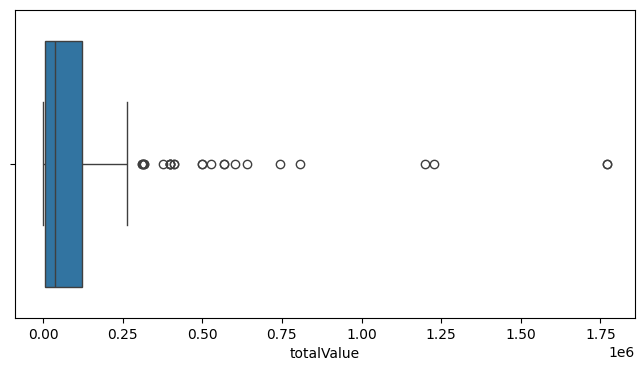

----------------------------------------
Primeros outliers positivos:
90     1227776.0
140    1769600.0
146    1769600.0
210    1200000.0
Name: totalValue, dtype: float64
----------------------------------------
----------------------------------------
Outliers encontrados con Z-Score:  4
Outliers encontrados con IQR:  25
----------------------------------------
Skewness: 4.273389123481969
Sesgo positivo (cola larga a la derecha)


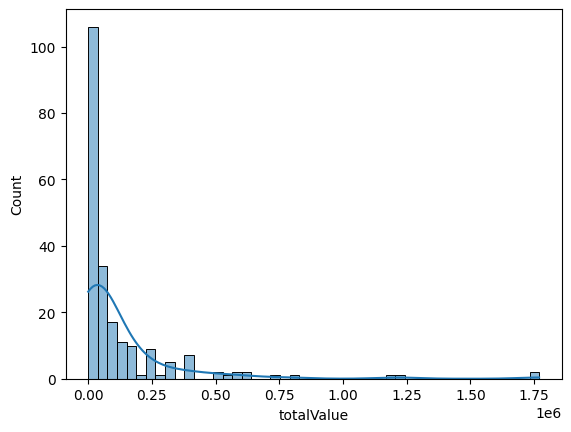

Skewness después de corregir el sesgo: -0.5777730330157603
Distribución aceptable


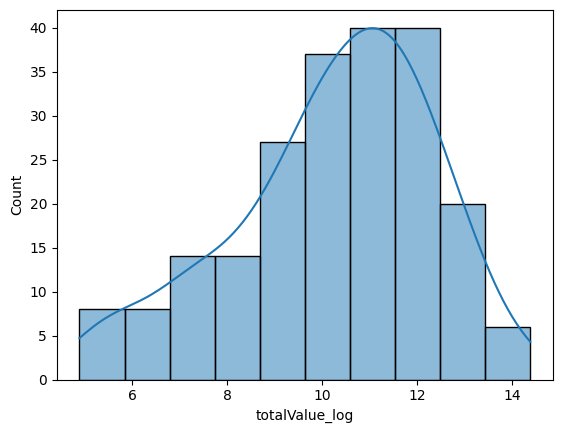

In [237]:
# Cargar el dataset de Order_v3
df = pd.read_csv("../../Recursos/CSVs/Order_v3.csv", encoding='latin1')

gestion_outliers(df, 'totalValue')

## DATAFRAME DIABETES
-   Diabetes --> bmi

Box plot de la columna 'bmi':


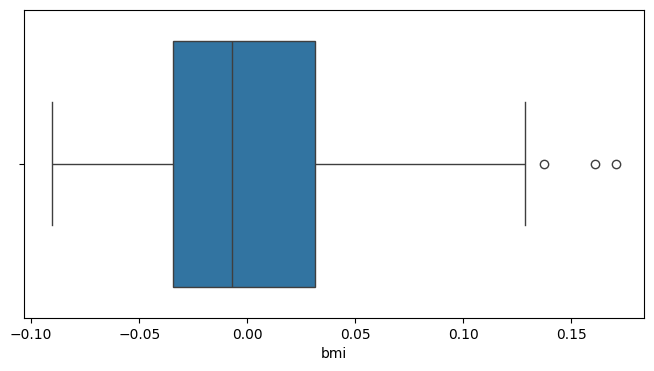

----------------------------------------
Primeros outliers positivos:
256    0.160855
367    0.170555
Name: bmi, dtype: float64
----------------------------------------
----------------------------------------
Outliers encontrados con Z-Score:  2
Outliers encontrados con IQR:  3
----------------------------------------
Skewness: 0.5961166556214368
Distribución aceptable


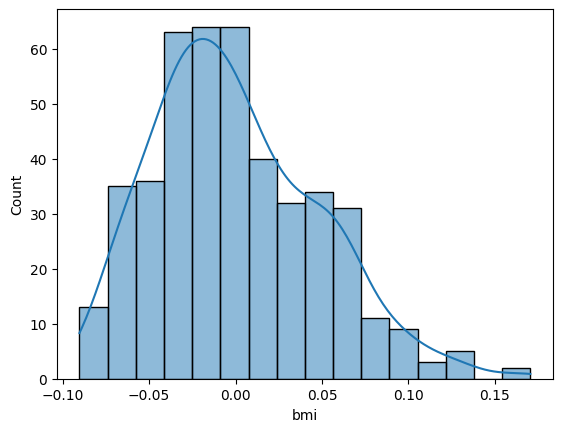

Skewness después de corregir el sesgo: 0.4782807934948481
Distribución aceptable


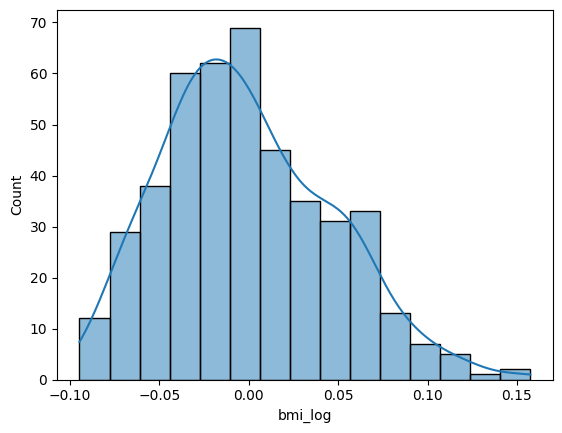

In [238]:
from sklearn.datasets import load_diabetes

# Cargar el dataset de Diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

gestion_outliers(df, 'bmi')

## DATAFRAME CALIFORNIA HOUSING
California: Housin --> MedInc

Box plot de la columna 'MedInc':


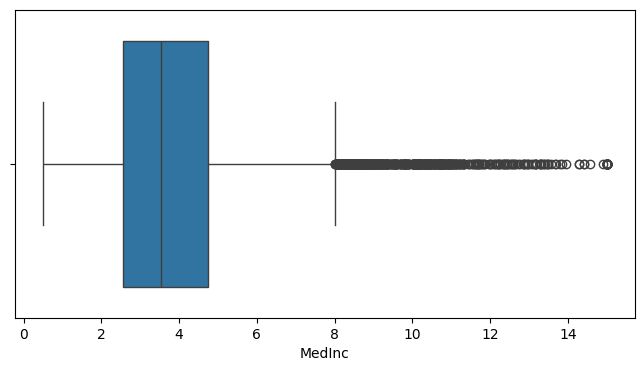

----------------------------------------
Primeros outliers positivos:
131    11.6017
409    10.0825
510    11.8603
511    13.4990
512    12.2138
Name: MedInc, dtype: float64
----------------------------------------
----------------------------------------
Outliers encontrados con Z-Score:  345
Outliers encontrados con IQR:  681
----------------------------------------
Skewness: 1.64653702990008
Sesgo positivo (cola larga a la derecha)


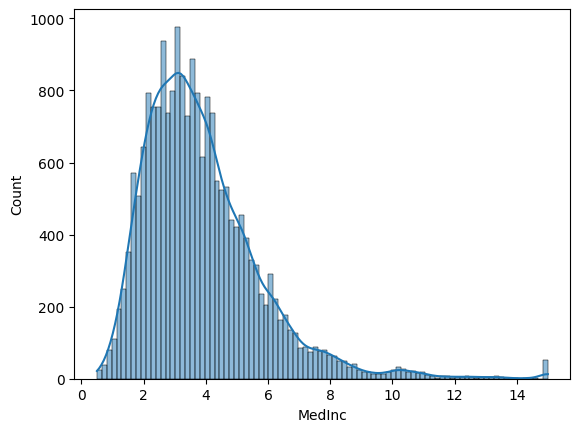

Skewness después de corregir el sesgo: 0.2260666998795291
Distribución aceptable


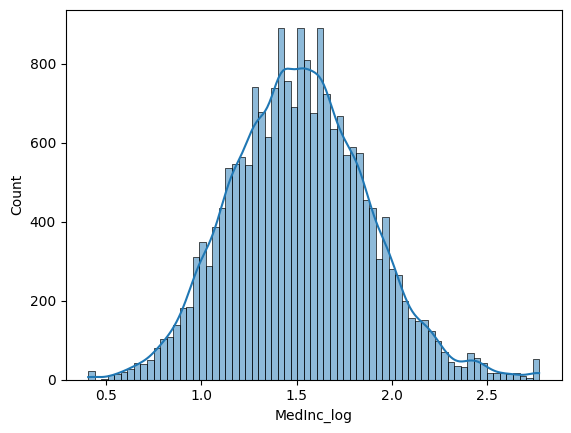

In [239]:
from sklearn.datasets import fetch_california_housing

# Cargar el dataset de California Housing
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)

gestion_outliers(df, 'MedInc')

## DATAFRAME Inventory_v2
inventory_v2 ---> value

Box plot de la columna 'value':


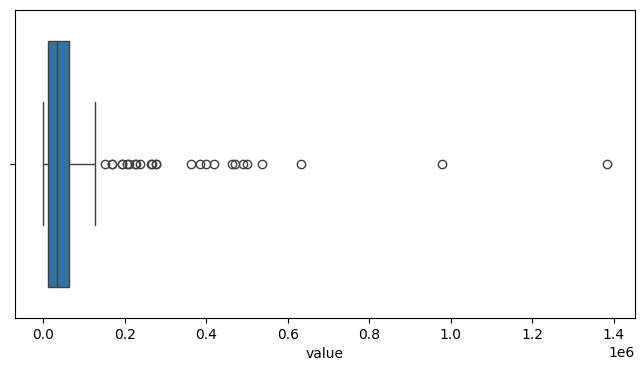

----------------------------------------
Primeros outliers positivos:
109     978810.0
142     632480.0
147    1382500.0
Name: value, dtype: float64
----------------------------------------
----------------------------------------
Outliers encontrados con Z-Score:  3
Outliers encontrados con IQR:  26
----------------------------------------
Skewness: 4.163668124495897
Sesgo positivo (cola larga a la derecha)


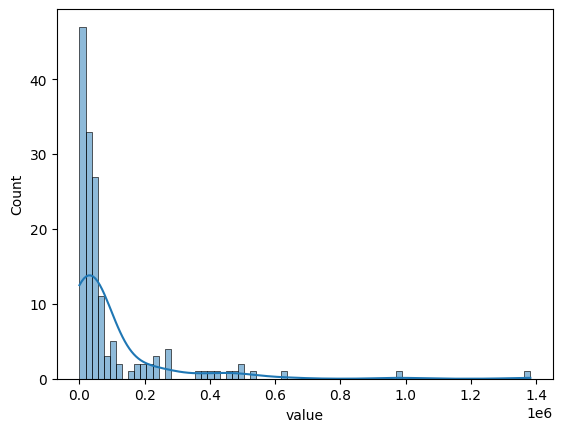

Skewness después de corregir el sesgo: -2.0012032223457874
Sesgo negativo (cola larga a la izquierda)


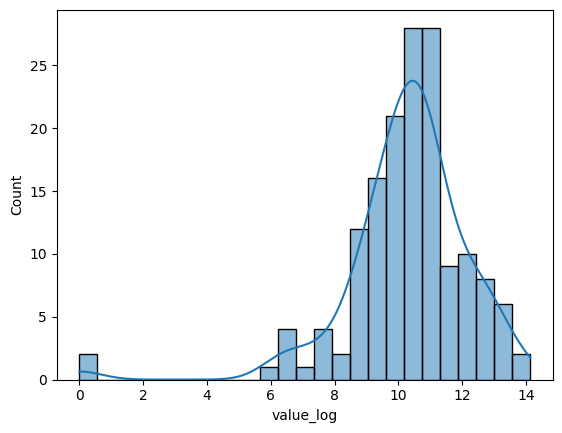

In [240]:
# Cargar el dataset de Order_v3
df = pd.read_csv("../../Recursos/CSVs/Inventory_v2.csv")

gestion_outliers(df, 'value')

## DATASET DIAMONDS
Diamonds --> Price

Box plot de la columna 'price':


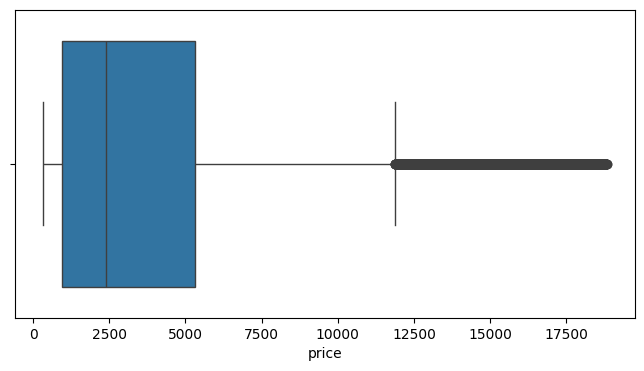

----------------------------------------
Primeros outliers positivos:
26394    15907
26395    15908
26396    15913
26397    15915
26398    15917
Name: price, dtype: int64
----------------------------------------
----------------------------------------
Outliers encontrados con Z-Score:  1206
Outliers encontrados con IQR:  3540
----------------------------------------
Skewness: 1.6183502776053016
Sesgo positivo (cola larga a la derecha)


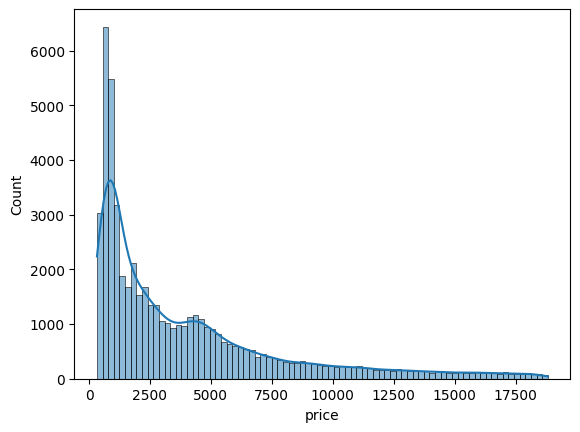

Skewness después de corregir el sesgo: 0.11592325501551193
Distribución aceptable


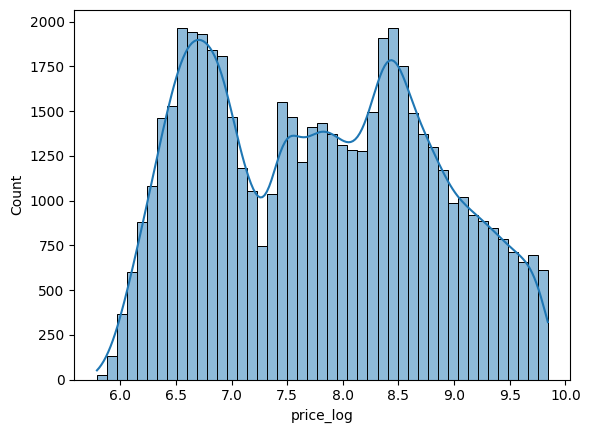

In [241]:
# Cargar el dataset de Diamonds
diamonds = sns.load_dataset("diamonds")

gestion_outliers(diamonds, 'price')